# Aerial Cactus Identification - EDA

Exploring the image classification dataset for cactus detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Load the data
train_df = pd.read_csv('/home/data/train.csv')
print(f"Training samples: {len(train_df)}")
print(f"Class distribution:")
print(train_df['has_cactus'].value_counts(normalize=True))

Training samples: 14175
Class distribution:
has_cactus
1    0.749771
0    0.250229
Name: proportion, dtype: float64


Train zip exists: True
Test zip exists: True


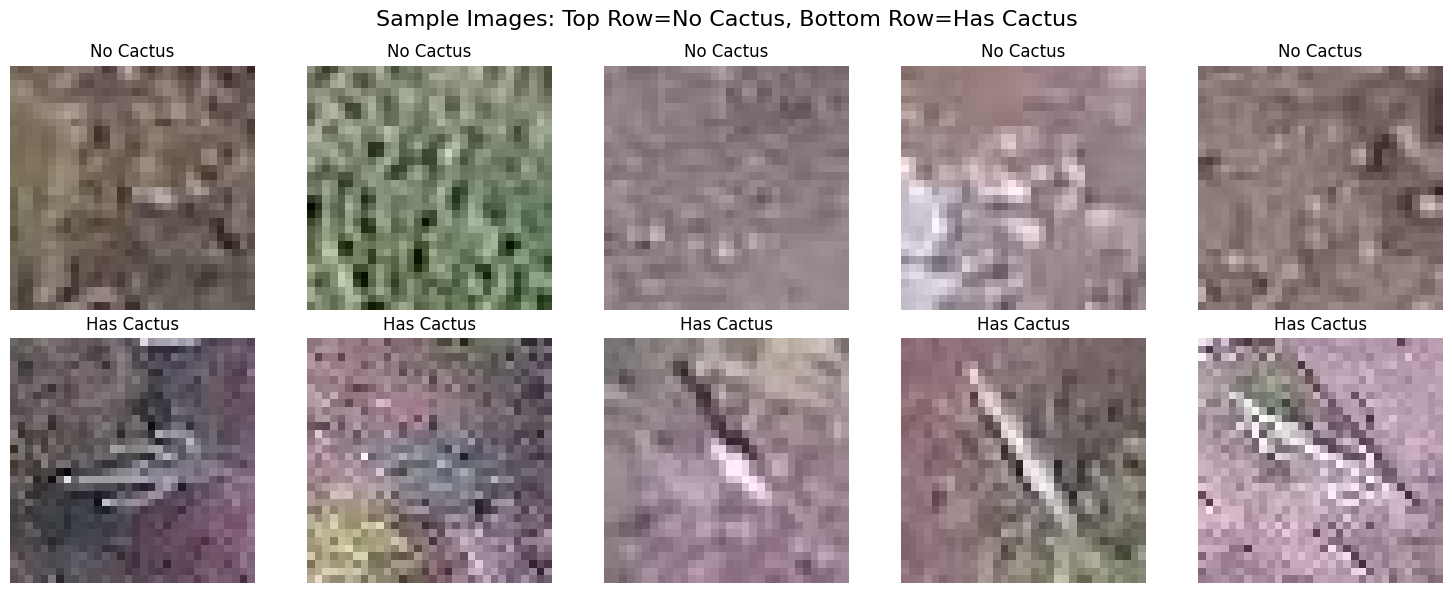

Image dimensions: (32, 32)
Image mode: RGB


In [3]:
# Let's examine some sample images
import zipfile
import io

# Check if train images are in zip or extracted
train_zip_path = '/home/data/train.zip'
test_zip_path = '/home/data/test.zip'

print(f"Train zip exists: {os.path.exists(train_zip_path)}")
print(f"Test zip exists: {os.path.exists(test_zip_path)}")

# Let's look at a few sample images from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images: Top Row=No Cactus, Bottom Row=Has Cactus', fontsize=16)

# Sample 5 images from each class
no_cactus_samples = train_df[train_df['has_cactus'] == 0].sample(5, random_state=42)
cactus_samples = train_df[train_df['has_cactus'] == 1].sample(5, random_state=42)

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    # Plot no cactus images
    for idx, (img_id, row) in enumerate(no_cactus_samples.iterrows()):
        img_data = zip_ref.read(row['id'])
        img = Image.open(io.BytesIO(img_data))
        axes[0, idx].imshow(img)
        axes[0, idx].set_title(f'No Cactus')
        axes[0, idx].axis('off')
    
    # Plot cactus images
    for idx, (img_id, row) in enumerate(cactus_samples.iterrows()):
        img_data = zip_ref.read(row['id'])
        img = Image.open(io.BytesIO(img_data))
        axes[1, idx].imshow(img)
        axes[1, idx].set_title(f'Has Cactus')
        axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

# Check image dimensions
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    first_img = zip_ref.read(train_df.iloc[0]['id'])
    img = Image.open(io.BytesIO(first_img))
    print(f"Image dimensions: {img.size}")
    print(f"Image mode: {img.mode}")